# Import Libraries

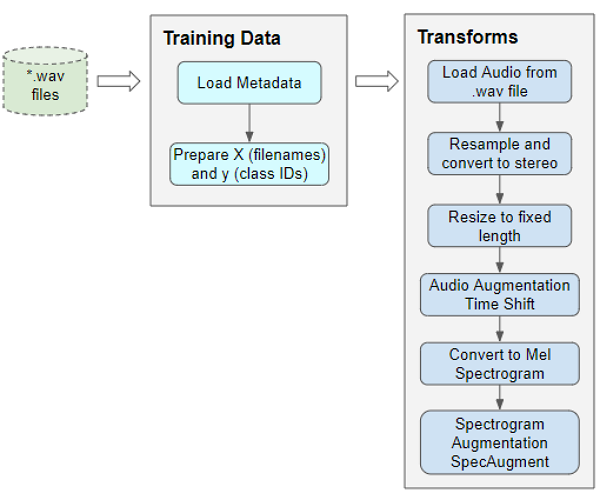

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import logging
import librosa


sns.set_theme()

In [2]:
module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"\\model")



logging.basicConfig(filename='../logs/notebook.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.INFO)

In [3]:
#we import our module script that we shall be using for preprocessing
logging.info(" ===== Loading created scripts ===== ")
try:    
    import audio
    logging.info(" ==== Succefully Loaded the Modules ===== ")
    print(" ===== Succefully loaded modules, modules are now ready to use ===== ")
except ImportError as error:
    
    logging.info(" !!!! Import Error  !!!! ")
    print(" !!!! The system ran into an Import Error \n ")
    print(error.__class__.__name__ + ": " + error.message)
    

 ===== Succefully loaded modules, modules are now ready to use ===== 


In [4]:
#we read the data
try:
    print("===== Reading Dataset ===== \n ")
    logging.info("====== Redaing Dataset ====== ")
    data=pd.read_csv('../data/merged_data.csv')
    print(" ==== Successfuly read dataset ===== \n")
except FileNotFoundError as e:
        
    logging.info(" !!!! File Not Found Error  !!!! ")
    print(" !!!! The system ran into a File Not Found Erro !!! \n ")
    print(error.__class__.__name__ + ": " + error.message)
    

===== Reading Dataset ===== 
 
 ==== Successfuly read dataset ===== 



In [6]:
#drop the unwanted columns

data

,wav_file,text,length
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30
...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49


In [8]:
#we create a function to add the root folder to the location of each wav file to make a complete path
location_directory=r'..\data\alldata'

def add_root(x):
    x=os.path.join(location_directory,x)
    
    return x

data['Location']=data['wav_file'].apply(lambda x:add_root(x) )

data
    


,wav_file,text,length,Location
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51,..\data\alldata\SWH-05-20101106_16k-emission_s...
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66,..\data\alldata\SWH-05-20101106_16k-emission_s...
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59,..\data\alldata\SWH-05-20101106_16k-emission_s...
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47,..\data\alldata\SWH-05-20101106_16k-emission_s...
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30,..\data\alldata\SWH-05-20101106_16k-emission_s...
...,...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38,..\data\alldata\SWH-15-20110310_16k-emission_s...
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39,..\data\alldata\SWH-15-20110310_16k-emission_s...
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43,..\data\alldata\SWH-15-20110310_16k-emission_s...
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49,..\data\alldata\SWH-15-20110310_16k-emission_s...


In [7]:
# import librosa
# import librosa.display
# audio, rate= librosa.load(data['Location'][0])
# plt.figure(figsize=(20, 5))
# librosa.display.waveplot(audio, sr=44100)

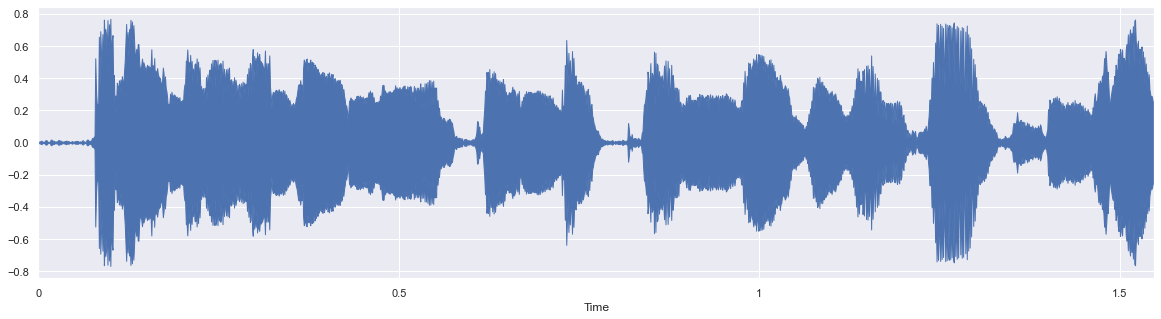

In [9]:
#call the plot wav function from the audio script to plot a sample wav file
audio.plot_wav(data['Location'][0],44100)

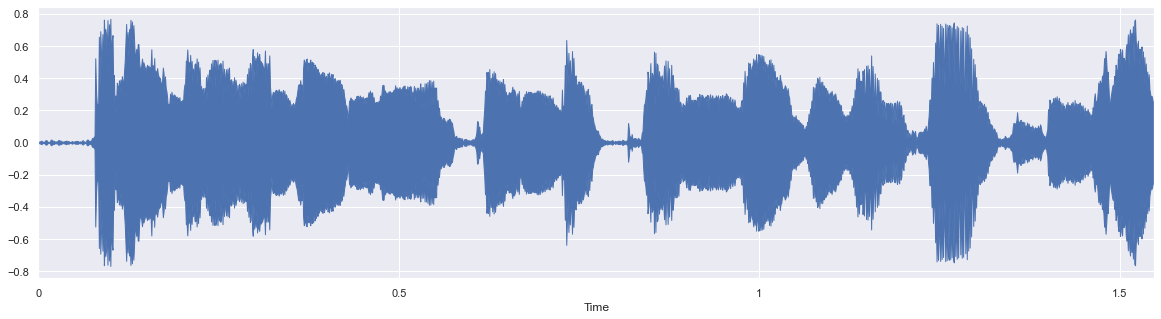

In [9]:
audio.sample_audio_play(data['Location'][0],44100)

In [10]:
#we call the ipython function to confirm our audio and text are correct 
import IPython.display as ipd
ipd.Audio(data['Location'][0],rate=44100)

## Conversion from Mono to Stero 

In [11]:
#
data['Location'].apply(lambda x: audio.make_stereo(x))
    

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47040, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=79520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43841, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55039, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=79680, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53761, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57759, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=69760, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59679, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43359, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48162, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52480, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51201, comptype='NONE', compname='not compr

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40160, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35040, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40161, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47840, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=72480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43039, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=92160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46082, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61121, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=67041, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66720, comptype='NONE', compname='not compr

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36161, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=65599, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53599, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=69440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=82080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47840, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36480, 

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=92000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35520, comptype='NONE', compname='not compr

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40640, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=97441, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=80160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=83201, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51361, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38876, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44478, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43041, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66080, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=92478, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=77283, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63361, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52638, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44959, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45603, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42400, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86876, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43681, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35837, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=60482, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40963, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=65283, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=70244, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49760, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61600, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=60320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38880, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66880, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=96800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41439, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=79841, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62080, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=80480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50720, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=84800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=72320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45599, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=85440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40800, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64161, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46879, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=65600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=83359, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=77600, 

 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51199, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, s

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=75360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=75680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37760, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38080, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=75520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86400, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=85440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41760, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34719, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=79360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73600, 

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45281, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38880, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48961, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=97441, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55359, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45921, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=67040, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55040, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=83840, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49439, 

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=60320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53600, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34559, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=90080, comptype='NONE', compname='not compr

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51681, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41121, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34718, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=92000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59360, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37760, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=68800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41121, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41601, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=75520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=94400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61760, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36321, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=78720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51040, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=76800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41440, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36799, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=72000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=60160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35681, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37599, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35521, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55839, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41120, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43840, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=81280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48480, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40640, 

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=72640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49759, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43840, comptype='NONE', compname='not compr

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73281, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43521, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35039, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54560, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43360, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=83520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=75520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63040, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53281, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=60161, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39360, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40798, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41761, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39519, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73601, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=95041, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40480, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=65600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=60480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64639, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=68320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=68320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57280, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=92320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=84640, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=89920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48001, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=69920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56640, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47519, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37441, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57439, 

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=71200, comptype='NONE', compname='not compr

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=69600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64001, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45281, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=67039, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35839, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39201, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55681, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50240, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=70880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=68480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53280, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=85440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=94080, 

======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=88960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47040, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61759, comptype='NONE', compname='not compressed')
 ======= Calculting left chan

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43519, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=81441, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59841, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38240, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38879, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73759, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47361, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35361, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=69280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=97600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=75680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=81281, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47360, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63041, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=96000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=71200, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=74080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53121, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=76320, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=78080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=97119, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=96160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=67200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52800, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63680, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=74560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58400, 

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37279, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=68320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45121, comptype='NONE', compname='not compr

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43201, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43041, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=54560, comptype='NONE', compname='not compr

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45599, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=69920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=78240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=94879, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=60480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=75200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=68320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=68320, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=95200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=81600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=78081, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34879, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=85599, 

 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61279, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36320, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, s

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51840, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=74560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66879, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43839, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47361, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44160, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=92960, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43040, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41761, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63041, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53760, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=79681, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=60959, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41123, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44318, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37119, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42560, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40802, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40642, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41599, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50240, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43521, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41120, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=67357, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=81439, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43998, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63201, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48638, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=76478, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=82240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59361, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=82240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62880, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=71520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35040, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=87360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51360, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=92160, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=70719, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55681, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53759, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=89920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=67841, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47040, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=48478, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39199, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35199, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38718, comptype='NONE', compname='not compr

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=89119, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=78560, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47681, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=75839, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53920, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64482, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53599, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43677, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61279, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44158, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58876, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36162, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=50240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=87041, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=42080, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=51517, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40322, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43201, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39998, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=44162, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73759, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35841, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=56798, 

====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35361, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=70080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=53443, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47200, comptype='NONE', compname='not compr

 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=77600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58080, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, s

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35839, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57600, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64000, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86081, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49281, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45119, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=78400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=67681, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57279, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35521, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=68640, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61119, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49441, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=65920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35201, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40000, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39201, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=72158, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=71041, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=93440, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55681, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=41920, 

 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=55520, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=62240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35201, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, s

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40480, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=63837, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=45603, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=47361, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=64322, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=58720, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=70880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=36318, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35841, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39998, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=49920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=40800, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66400, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=43200, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, s

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=37599, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=39679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=73280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=77121, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=59680, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=34560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=66560, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=57281, 

====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=38240, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61920, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46880, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=52960, 

_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=46082, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=35679, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=61761, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channels ======= 
====== overwriting wav file ======= 
======= Mono to stereo audio conversion
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=81280, comptype='NONE', compname='not compressed')
 ======= Calculting left channel type =====
====== converting channel

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\alldata\\SWH-15-20101113_16k-emission_swahili_15h00_-_16h00_tu_20101113_part197.wav'

In [12]:
data

,wav_file,text,length,Location
0,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,yanayo andaliwa nami pendo pondo idhaa ya kisw...,51,..\data\alldata\SWH-05-20101106_16k-emission_s...
1,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,inayokutangazia moja kwa moja kutoka jijini da...,66,..\data\alldata\SWH-05-20101106_16k-emission_s...
2,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,juma hili bara la afrika limeshuhudia raia wa ...,59,..\data\alldata\SWH-05-20101106_16k-emission_s...
3,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,wakipiga kura ya maoni ilikufanya mabadiliko ya,47,..\data\alldata\SWH-05-20101106_16k-emission_s...
4,SWH-05-20101106_16k-emission_swahili_05h30_-_0...,kule abidjan raia wa jiji hilo,30,..\data\alldata\SWH-05-20101106_16k-emission_s...
...,...,...,...,...
10174,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,na somo lile lililopokelewa kule kenya,38,..\data\alldata\SWH-15-20110310_16k-emission_s...
10175,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ambapo mtu aliyeshindwa kwenye uchaguzi,39,..\data\alldata\SWH-15-20110310_16k-emission_s...
10176,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,ni kauli yake mchambuzi wa masuala ya siasa,43,..\data\alldata\SWH-15-20110310_16k-emission_s...
10177,SWH-15-20110310_16k-emission_swahili_15h00_-_1...,mwanasheria anayemtetea rais wa zamani wa liberia,49,..\data\alldata\SWH-15-20110310_16k-emission_s...


ValueError: x and y must have same first dimension, but have shapes (50,) and (68355,)

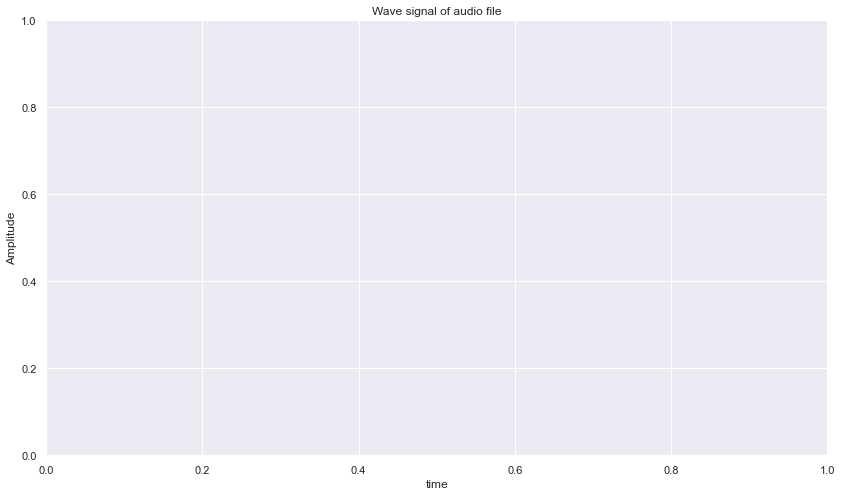

In [15]:
samples,sample_rate=librosa.load(data['Location'][0])
fig=plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(111)
ax1.set_title('Wave signal of audio file')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace( sample_rate/len(samples), sample_rate), samples)

## Resize the Audio

In [16]:
ipd.Audio(samples,rate=sample_rate)


In [17]:
print(sample_rate)

22050


In [18]:
samples=librosa.resample(samples,sample_rate,8000)
ipd.Audio(samples,rate=8000)

In [19]:
#calculate the duration of the audio files 
recording_duration=[]
for recordings in data['Location']:
    recording_duration.append(audio.caclulate_duration(recordings))

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =================
 ============ Calculating duration of audio file =============

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\alldata\\SWH-15-20101113_16k-emission_swahili_15h00_-_16h00_tu_20101113_part197.wav'

Text(0.5, 0, 'Frequency')

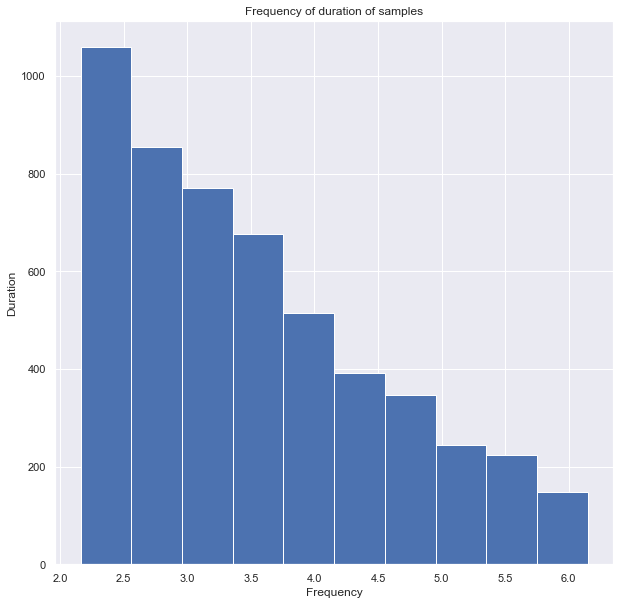

In [20]:
plt.figure(figsize=(10,10))
plt.hist(np.array(recording_duration))
plt.title("Frequency of duration of samples")
plt.ylabel("Duration")
plt.xlabel("Frequency")

we note that most of the audio files are around 2.5 seconds long and a few are above 6 seconds long. 
We resize by adding padding to the end of the shorter clips in hopes of creating a standard sample

In [21]:
avg=sum(recording_duration)/len(recording_duration)
avg

3.5221720658684967

In [22]:
len(recording_duration)

5229

## Resampling to standard Frequency rate

For a uniform classification of our text we resample to a similar sampling frequency which is 8000 hz - taking 8000 samples per second

In [ ]:
resample=[]

for recordings in data['Location']:
    samples,sample_rate=librosa.load(recordings)
    samples=librosa.resample(samples,sample_rate,8000)
    resample.append(samples)
    
    

In [34]:
resampledd={}
counter=0
for recordings in data['Location']:
    samples,sample_rate=librosa.load(recordings)
    samples=librosa.resample(samples,sample_rate,8000)
    resampledd[recordings]=[samples,data['text'][counter]]
    counter+=1
    

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\alldata\\SWH-15-20101113_16k-emission_swahili_15h00_-_16h00_tu_20101113_part197.wav'

In [39]:
data_master=pd.DataFrame.from_dict(resampledd, orient ='index')
data_master=data_master.reset_index()

In [35]:
resampledd

{'..\\data\\alldata\\SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part100.wav': [array([ 0.00386104,  0.00561212,  0.00383458, ...,  0.03412592,
         -0.02370067,  0.01644961], dtype=float32),
  'yanayo andaliwa nami pendo pondo idhaa ya kiswahili'],
 '..\\data\\alldata\\SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part101.wav': [array([0.00607792, 0.00734194, 0.00941597, ..., 0.17351705, 0.2001552 ,
         0.        ], dtype=float32),
  'inayokutangazia moja kwa moja kutoka jijini dar es salaam tanzania'],
 '..\\data\\alldata\\SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part102.wav': [array([-0.00760717, -0.01193155, -0.0097027 , ..., -0.27007535,
         -0.3289366 , -0.2028154 ], dtype=float32),
  'juma hili bara la afrika limeshuhudia raia wa nchi za niger'],
 '..\\data\\alldata\\SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part103.wav': [array([0.00830972, 0.01390544, 0.01246122, ..., 0.0255863 , 0.029

In [44]:
data_master.columns=['wav_file','samples','text']
data_master['duration']=recording_duration

In [45]:
data_master

,wav_file,samples,text,duration
0,..\data\alldata\SWH-05-20101106_16k-emission_s...,"[0.0038610438, 0.0056121238, 0.003834576, 0.00...",yanayo andaliwa nami pendo pondo idhaa ya kisw...,3.100000
1,..\data\alldata\SWH-05-20101106_16k-emission_s...,"[0.006077918, 0.0073419427, 0.009415968, -0.00...",inayokutangazia moja kwa moja kutoka jijini da...,3.650023
2,..\data\alldata\SWH-05-20101106_16k-emission_s...,"[-0.0076071704, -0.01193155, -0.009702701, -0....",juma hili bara la afrika limeshuhudia raia wa ...,3.900000
3,..\data\alldata\SWH-05-20101106_16k-emission_s...,"[0.008309716, 0.013905439, 0.012461223, 0.0132...",wakipiga kura ya maoni ilikufanya mabadiliko ya,2.940000
4,..\data\alldata\SWH-05-20101106_16k-emission_s...,"[0.0013255909, 0.00054343906, -0.0007398589, 0...",kule abidjan raia wa jiji hilo,2.450023
...,...,...,...,...
5224,..\data\alldata\SWH-15-20101113_16k-emission_s...,"[-0.027875276, -0.01504189, 0.022159595, 0.045...",kwa hivyo namhudumia kwa sababu nipo kazini na...,4.140000
5225,..\data\alldata\SWH-15-20101113_16k-emission_s...,"[-0.009932839, 0.00033389992, 0.019746644, 0.0...",nashukuru sana grace <UNK>,3.620000
5226,..\data\alldata\SWH-15-20101113_16k-emission_s...,"[0.02188619, -0.032336053, -0.0077718534, 0.04...",<UNK> eeh ndugu msikilizaji unaendelea kuwa na...,5.609977
5227,..\data\alldata\SWH-15-20101113_16k-emission_s...,"[0.03850753, 0.063698985, 0.03404627, 0.039842...",hapa mlalakuwa mkabala na mlimani city,2.590068


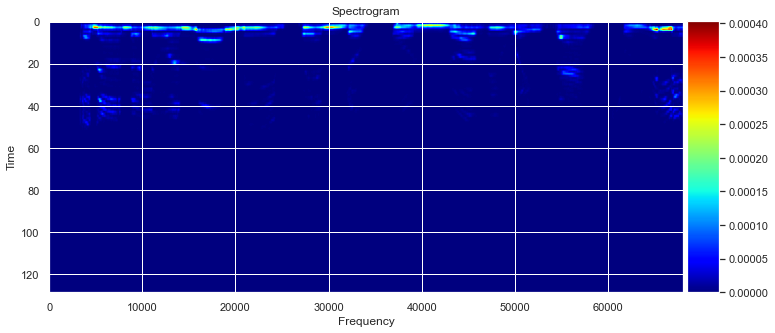

In [47]:
audio.plot_spectogram(data_master['wav_file'][0])

This is a time-frequency spectogram. It inidicates the frequcny of the sound at a given time,The color scale on the left indicates the frequcny with deeper colors inidcating lower frequencies.This particular audio file indicates higher frequencies in as the audio clip begins and the audio clip only lasts for a few seconds and hence why it dulls out to no frequencies qucickly

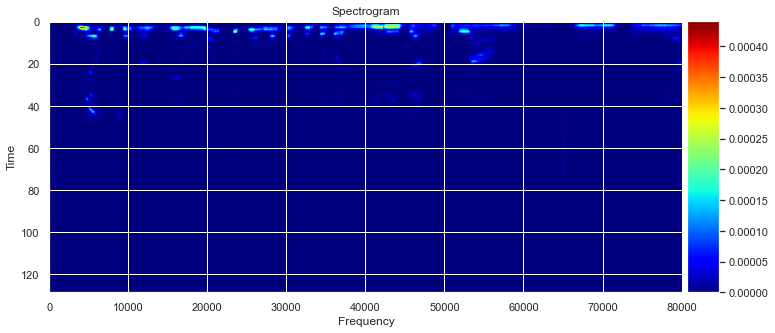

In [13]:
audio.plot_spectogram(data['Location'][1])

In [51]:
from sklearn.preprocessing import LabelEncoder

y=data_master['text']

encoder=LabelEncoder()
y=encoder.fit_transform(y)
classes=list(encoder.classes_)



In [54]:
classes

['16k-emission_swahili_05h30_-_06h00_tu_20101121_part210',
 '16k-emission_swahili_05h30_-_06h00_tu_20101123_part195',
 '<UNK>',
 '<UNK> alisitisha uchimbaji wa madini katika maeneo ya kivu kaskazini kivu kusini na maniema',
 '<UNK> ambao umeonekana huko ndio <UNK> ma',
 '<UNK> eeh ndugu msikilizaji unaendelea kuwa nami edmilo wangi cheli',
 '<UNK> hatua hiyo imechukuliwa wakati huu',
 '<UNK> hii inalenga waafrika na haiguzi wale wengine',
 '<UNK> hilo ndio jambo ambalo mimi naona la msingi sana jambo nzuri sana',
 '<UNK> hususan kulipiwa karo mashuleni na gharama za hospitali',
 '<UNK> imeirudisha chini sana',
 '<UNK> inalenga waafrika na haiguzi wale wengine',
 '<UNK> juu ya kesi hiyo inawakabili',
 '<UNK> kama percentage kama themanini',
 '<UNK> kitu pekee ni kuwa watakaogundulika kufanya udanganyifu huo',
 '<UNK> kuendelea huku nchini kwao anasema kwamba hile gazeti la sunday times',
 '<UNK> kufanikisha hilo',
 '<UNK> kufikia kesho tunafanya bidii sana',
 '<UNK> kwa kuwa imesababish

In [57]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(data_master))

In [60]:
resmaple = np.array(resample).reshape(-1,8000,1)

In [61]:
resample

[array([ 0.00386104,  0.00561212,  0.00383458, ...,  0.03412592,
        -0.02370067,  0.01644961], dtype=float32),
 array([0.00607792, 0.00734194, 0.00941597, ..., 0.17351705, 0.2001552 ,
        0.        ], dtype=float32),
 array([-0.00760717, -0.01193155, -0.0097027 , ..., -0.27007535,
        -0.3289366 , -0.2028154 ], dtype=float32),
 array([0.00830972, 0.01390544, 0.01246122, ..., 0.0255863 , 0.02915221,
        0.0439747 ], dtype=float32),
 array([ 0.00132559,  0.00054344, -0.00073986, ..., -0.17921087,
        -0.09451021,  0.        ], dtype=float32),
 array([0.00337743, 0.00840342, 0.00710637, ..., 0.17063653, 0.13628258,
        0.08041241], dtype=float32),
 array([0.00417878, 0.00664741, 0.00548905, ..., 0.06925223, 0.12979895,
        0.11708841], dtype=float32),
 array([-0.00173427, -0.00206189, -0.00133683, ..., -0.05295629,
        -0.21929432,  0.        ], dtype=float32),
 array([-8.6947752e-05, -8.3921076e-04, -1.9680166e-03, ...,
        -2.6431957e-03, -3.4548420e